# Phase 1 - Week 2 - Day 3 AM - Hyperparameter Tuning

> **For simplicity only, in this notebook there are no handling outliers and handling missing values. The purpose of this notebook is just to demonstrate how to use Hyperparameter Tuning.**

For this tutorial, we will use dataset that contains demographics about customer and whether that customer buy a product from ads or not.

# A. Data Loading & Preprocessing

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

In [2]:
# Data Loading

ads_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4PM%20-%20Social%20Network%20Ads.csv')
ads_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
ads_df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
# Splitting between `X` and `y`

X = ads_df.drop(['Purchased'], axis=1)
y = ads_df['Purchased']
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [5]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (300, 2)
Test size  :  (100, 2)


In [6]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# B. Baseline Model

Let's create baseline model. Baseline model is a model that is trained using default parameters

In [7]:
# Baseline Model using Random Forest Algorithm

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

F1 Score - Train Set  :  0.9910714285714286 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       188
           1       0.99      0.99      0.99       112

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300
 

Confusion Matrix      : 


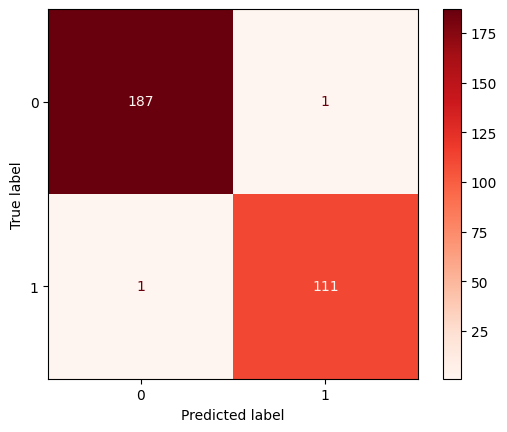

In [8]:
# Check Performance Model against Train-Set

y_pred_train = rf.predict(X_train_scaled)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_scaled, y_train, cmap='Reds'))

# C. Cross Validation

Wow ! Our model achieve 99 % on F1-Score for the training-set.

* Is this just a coincidence?
* Is this score valid?
* How if the model gets data that is easy to learn on the train-set while later on the test-set contain data that is difficult to learn/predict?

To answer these questions, we are gonna use Cross Validation. Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset. Cross-validation provides performance measurements such as mean and standard deviation.

* Mean : **how well** the procedure performs on average.
* Standard deviation : **how much** the procedure is expected to vary in practice.

Mean and standard deviation can be used to give a confidence interval on the expected performance on a machine learning procedure in practice.

In [9]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_train_cross_val = cross_val_score(rf,
                                     X_train_scaled,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.86842105 0.81690141 0.80519481]
F1 Score - Mean - Cross Validation :  0.8301724220923629
F1 Score - Std - Cross Validation  :  0.02746487992014353
F1 Score - Range of Test-Set       :  0.8027075421722193 - 0.8576373020125064
CPU times: user 506 ms, sys: 4.36 ms, total: 510 ms
Wall time: 525 ms


F1 Score - Test Set   :  0.8656716417910448 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93        69
           1       0.81      0.94      0.87        31

    accuracy                           0.91       100
   macro avg       0.89      0.92      0.90       100
weighted avg       0.92      0.91      0.91       100
 

Confusion Matrix      : 


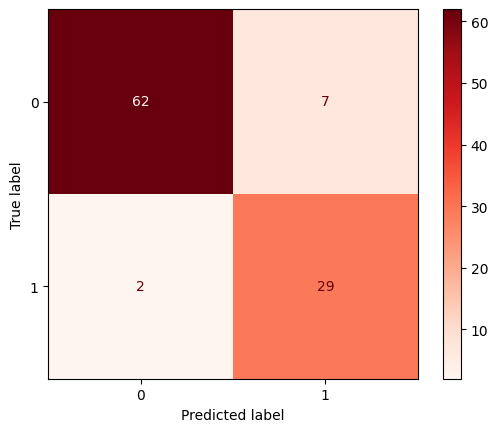

In [10]:
# Check Performance Model against Test-Set

y_pred_test = rf.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap='Reds'))

In [11]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.910000
test - f1_score,0.865672
test - precision,0.805556
test - recall,0.935484
train - accuracy,0.993333
train - f1_score,0.991071
train - precision,0.991071
train - recall,0.991071


# D. Hyperparameter Tuning

## D.1 - Manual Search

In [12]:
# Hyperparameter Tuning : Manual Search

%%time

rf_ms_1 = RandomForestClassifier(n_estimators=300,
                                 min_samples_leaf=10,
                                 random_state=10)
rf_ms_1.fit(X_train_scaled, y_train)

CPU times: user 486 ms, sys: 2.87 ms, total: 488 ms
Wall time: 496 ms


RandomForestClassifier(min_samples_leaf=10, n_estimators=300, random_state=10)

F1 Score - Train Set  :  0.8936170212765958 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       188
           1       0.85      0.94      0.89       112

    accuracy                           0.92       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.92      0.92       300
 

Confusion Matrix      : 


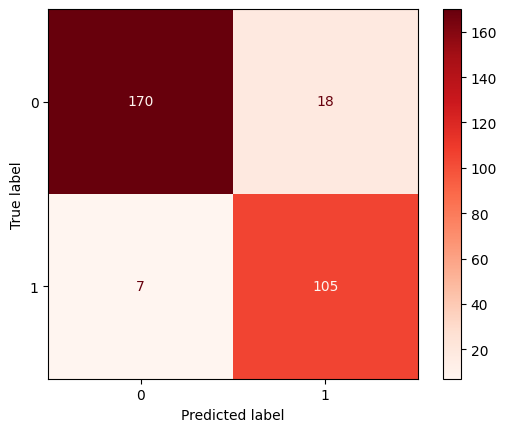

In [13]:
# Check Performance Model against Train-Set

y_pred_train = rf_ms_1.predict(X_train_scaled)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_train_scaled, y_train, cmap='Reds'))

In [14]:
# Cross Validation using `cross_val_score`

%%time
f1_train_cross_val = cross_val_score(rf_ms_1,
                                     X_train_scaled,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.93670886 0.86486486 0.86419753]
F1 Score - Mean - Cross Validation :  0.8885904188295187
F1 Score - Std - Cross Validation  :  0.03402596727984276
F1 Score - Range of Test-Set       :  0.854564451549676 - 0.9226163861093615
CPU times: user 1.42 s, sys: 8.82 ms, total: 1.43 s
Wall time: 1.43 s


We can see that the mean-accuracy of Cross Validation from model `rf_ms_1` (with new hyperparameter) is higher than model `rf` (using default parameter).

We also can expect that the performance of test-set using `rf_ms_1` is higher (or at least still in range) than `rf`. Let's prove this!

F1 Score - Test Set   :  0.8787878787878788 

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        69
           1       0.83      0.94      0.88        31

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.93      0.92      0.92       100
 

Confusion Matrix      : 


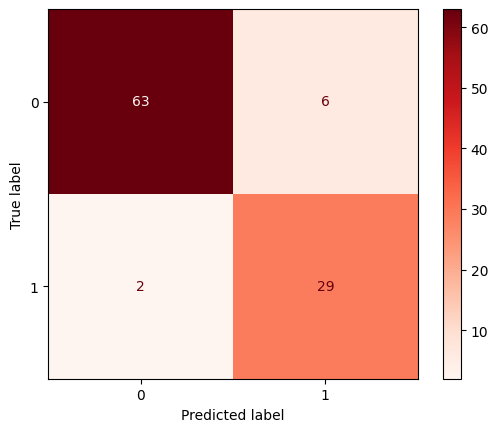

In [15]:
# Check Performance Model against Test-Set

y_pred_test = rf_ms_1.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_test_scaled, y_test, cmap='Reds'))

In [16]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Manual Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search
train - precision,0.991071,0.853659
train - recall,0.991071,0.937500
train - accuracy,0.993333,0.916667
train - f1_score,0.991071,0.893617
test - precision,0.805556,0.828571
test - recall,0.935484,0.935484
test - accuracy_score,0.910000,0.920000
test - f1_score,0.865672,0.878788


As we can see from above table, our model performance is improve both in train and test.

Of course, we can try another hyperparameter manually and do Cross Validation. **But, what if we want to try many configurations of hyperparameters ? Should we input manual the configurations and run manually? NO.** In the following, we will use `RandomSearchCV` and `GridSearchCV` to optimize this process.

## D.2 - Random Search

In [17]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
random_search_params

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

In [18]:
# Train with Random Search
%%time

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
rf_randomcv.fit(X_train_scaled, y_train)

CPU times: user 5.97 s, sys: 860 ms, total: 6.83 s
Wall time: 6min 17s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46, scoring='f1')

In [19]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_depth': 120}

In [20]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_

F1 Score - Test Set   :  0.8955223880597015 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95        69
           1       0.83      0.97      0.90        31

    accuracy                           0.93       100
   macro avg       0.91      0.94      0.92       100
weighted avg       0.94      0.93      0.93       100
 

Confusion Matrix      : 


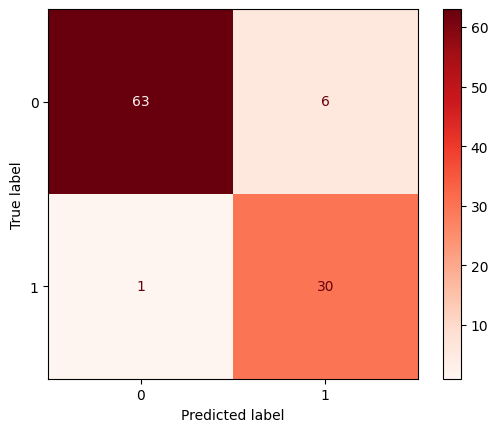

In [21]:
# Check Performance Model against Test-Set

y_pred_test = rf_randomcv_best.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_scaled, y_test, cmap='Reds'))

In [22]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Random Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search,Random Search
train - precision,0.991071,0.853659,0.853659
train - recall,0.991071,0.937500,0.937500
train - accuracy,0.993333,0.916667,0.916667
train - f1_score,0.991071,0.893617,0.893617
test - precision,0.805556,0.828571,0.833333
test - recall,0.935484,0.935484,0.967742
test - accuracy_score,0.910000,0.920000,0.930000
test - f1_score,0.865672,0.878788,0.895522


## D.3 - Grid Search

In [23]:
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# Reuse best hyperparameters from Random Search for efficiency
grid_search_params = {
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'] - 50,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 50,
                     rf_randomcv.best_params_['n_estimators'] + 100],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
}

grid_search_params

{'n_estimators': [1100, 1150, 1200, 1250, 1300],
 'max_depth': [120],
 'min_samples_split': [8, 9, 10, 11, 12],
 'min_samples_leaf': [8, 10, 12]}

In [24]:
# Display Best Hyperparamters from Random Search

rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_depth': 120}

In [25]:
# Train with Grid Search
%%time

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='f1')

rf_gridcv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 8.81 s, sys: 1.44 s, total: 10.3 s
Wall time: 11min 38s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [120], 'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [1100, 1150, 1200, 1250, 1300]},
             scoring='f1', verbose=2)

In [30]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'max_depth': 120,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 1100}

In [27]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

F1 Score - Test Set   :  0.8955223880597015 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.91      0.95        69
           1       0.83      0.97      0.90        31

    accuracy                           0.93       100
   macro avg       0.91      0.94      0.92       100
weighted avg       0.94      0.93      0.93       100
 

Confusion Matrix      : 


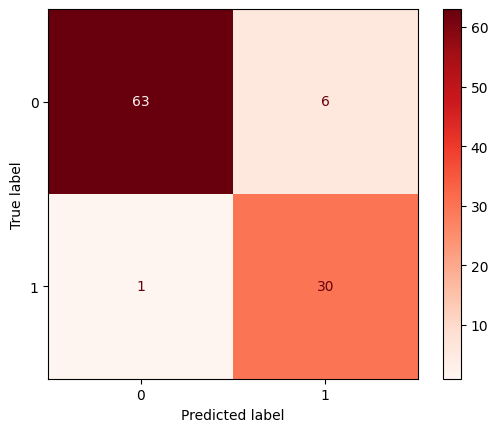

In [28]:
# Check Performance Model against Test-Set

y_pred_test = rf_gridcv_best.predict(X_test_scaled)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_scaled, y_test, cmap='Reds'))

In [29]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Grid Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search,Random Search,Grid Search
train - precision,0.991071,0.853659,0.853659,0.853659
train - recall,0.991071,0.937500,0.937500,0.937500
train - accuracy,0.993333,0.916667,0.916667,0.916667
train - f1_score,0.991071,0.893617,0.893617,0.893617
test - precision,0.805556,0.828571,0.833333,0.833333
test - recall,0.935484,0.935484,0.967742,0.967742
test - accuracy_score,0.910000,0.920000,0.930000,0.930000
test - f1_score,0.865672,0.878788,0.895522,0.895522


Even though `RandomSearchCV` and `GridSearchCV` produce the same performance, but the best hyperparameters is different.

From `RandomSearchCV` :
```
'n_estimators': 1200,
'max_depth': 120,
'min_samples_leaf': 8,
'min_samples_split': 10,
```

From `GridSearchCV` :
```
'n_estimators': 1100
'max_depth': 120,
'min_samples_leaf': 8,
'min_samples_split': 8,

```